In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

# Cargar el modelo preentrenado EfficientNetB0
model = EfficientNetB0(weights='imagenet')

def classify_image(img_path):
    # Cargar y preparar la imagen
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Tamaño de entrada para EfficientNetB0

    # Convertir la imagen a un array y procesarla
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Realizar la predicción con el modelo
    predictions = model.predict(img_array)

    # Decodificar y retornar las predicciones
    return decode_predictions(predictions, top=3)[0]

21834768/21834768 [==============================] - 2s 0us/step


In [19]:
from PIL import Image

def cambiar_tamano_imagen(archivo_entrada, archivo_salida, nuevo_ancho, nuevo_alto):
    try:
        imagen = Image.open(archivo_entrada)
        imagen_resized = imagen.resize((nuevo_ancho, nuevo_alto))
        imagen_resized.save(archivo_salida)
        print("Imagen redimensionada y guardada correctamente.")
    except Exception as e:
        print(f"Error al redimensionar la imagen: {e}")

# Ejemplo de uso
archivo_entrada = "caballo.JPG"
archivo_salida = "caballo_redimensionada.jpg"
nuevo_ancho = 240
nuevo_alto = 240

cambiar_tamano_imagen(archivo_entrada, archivo_salida, nuevo_ancho, nuevo_alto)


Imagen redimensionada y guardada correctamente.


Tipo de datos de la imagen: uint8


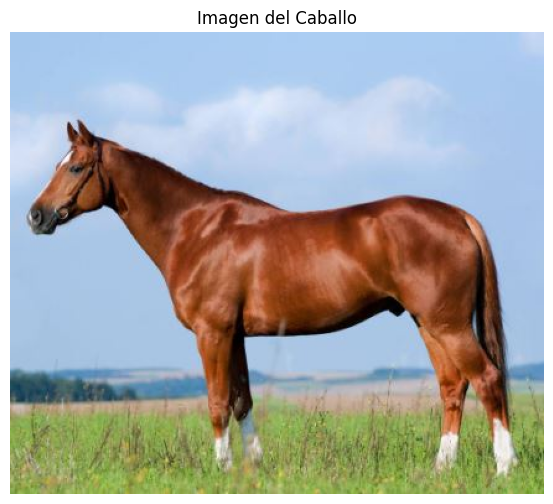

In [23]:
import cv2
from matplotlib import pyplot as plt
import os

# Ruta completa de la imagen
image_path = '/content/caballo.JPG'
# Intenta cargar la imagen
try:
    image = cv2.imread(image_path)

    # Verifica si la imagen se cargó correctamente
    if image is None:
        print("Error: No se pudo cargar la imagen.")
    else:
        # Verificar el tipo de datos de la imagen
        print("Tipo de datos de la imagen:", image.dtype)

        # Convertir BGR a RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Usar matplotlib para mostrar la imagen
        plt.figure(figsize=(12, 6))
        plt.imshow(image_rgb)
        plt.title('Imagen del Caballo')
        plt.axis('off')  # Desactivar ejes
        plt.show()

except Exception as e:
    print(f"Error: {e}")


In [9]:
# Prueba con una imagen local

predictions = classify_image(archivo_salida)

print('\n')

# Mostrar las predicciones
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 0s 154ms/step


1: sorrel (0.95)
2: horse_cart (0.00)
3: hartebeest (0.00)
